In [1]:
import xarray as xr
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import HourLocator

In [3]:
root = "ipfs://QmfAzqPtR99owGURk27JV4Vgwun1CxRpKjomtkBxYufv5b"
dset_meteo = xr.open_dataset(f"{root}/DShip.zarr",engine="zarr")
dset_celio = xr.open_dataset(f"{root}/ceilometer/CHM170158.zarr",engine="zarr")
dset_sea_snake = xr.open_dataset(f"{root}/SeaSnake/met_203_1_SeaSnake.zarr",engine="zarr")
dset_termo = xr.open_dataset(f"{root}/thermosalinograph/met_203_1_tsal.zarr",engine="zarr")

In [4]:
root_radio = 'ipfs://QmSUUUPcGcpwdJJCVDGPGYksLsqkWbfh6d6xFcTk2Qu7Zf'
dset_radio = xr.open_dataset(f"{root_radio}/RAPSODI_RS_ORCESTRA_level2.zarr",engine="zarr")

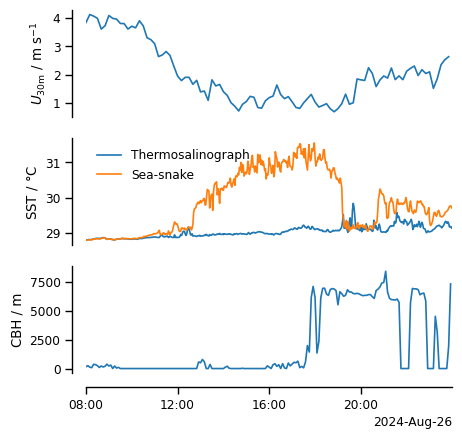

In [5]:
sns.set_context("paper")
fig = plt.figure(figsize=(12/2.54,12/2.54),facecolor='white')
ax= fig.add_subplot(311)
dset_meteo.wspd.sel(
    time=slice('2024-08-26 08:00:00','2024-08-26 23:59:00')).resample(time='10min').mean().plot()
ax.set_xlim([dset_meteo.time.sel(time='2024-08-26 08:00:00'),
            dset_meteo.time.sel(time='2024-08-26 23:59:00')])
ax.set_xlabel(None)
ax.set_xticks([])
ax.set_xticklabels({})
ax.set_ylabel(r'$U_\mathrm{30m}$ / m s$^{-1}$')
sns.despine(offset=10,ax=ax)
ax.spines['bottom'].set_visible(False)

ax= fig.add_subplot(312)
dset_termo.TEMP.sel(
    TIME=slice('2024-08-26 08:00:00','2024-08-26 23:59:00')).resample(TIME='2min').mean().plot(
    label='Thermosalinograph'
    )
dset_sea_snake.TEMP.sel(
    TIME=slice('2024-08-26 08:00:00','2024-08-26 23:59:00')).resample(TIME='2min').mean().plot(
    label='Sea-snake'
    )
ax.set_xlim([dset_meteo.time.sel(time='2024-08-26 08:00:00'),
            dset_meteo.time.sel(time='2024-08-26 23:59:00')])

ax.set_ylabel(r'SST / $\degree$C')
ax.set_xlabel(None)
ax.set_xticks([])
ax.set_xticklabels({})
sns.despine(offset=10,ax=ax)
ax.spines['bottom'].set_visible(False)
plt.legend(frameon=False)

ax= fig.add_subplot(313)
dset_celio.cbh.sel(
    time= slice('2024-08-26 08:00:00','2024-08-26 23:59:00'),layer=1).resample(
    time='5min').mean().plot(
    )
ax.set_xlim([dset_meteo.time.sel(time='2024-08-26 08:00:00'),
            dset_meteo.time.sel(time='2024-08-26 23:59:00')])
sns.despine(offset=10,ax=ax)
ax.set_ylabel(r'CBH / m')
ax.xaxis.set_major_locator(HourLocator(byhour=range(0,24,4)))
ax.set_xlabel(None)
ax.set_title(None)

plt.savefig('../../../figures/wind_sst_cbh_doldrums.pdf',
            format='pdf',bbox_inches='tight',orientation={'landscape'})


In [5]:
dset_rad_meteor= dset_radio.where((dset_radio.platform=='RV_Meteor') & (dset_radio.ascent_flag==0),drop=True)

In [6]:
dset_rad_sel = dset_rad_meteor.sel(
    launch_time=slice('2024-08-26 08:00:00','2024-08-26 23:00:00'),
    alt=slice(0,1000))

In [7]:
colormap = plt.cm.Blues #nipy_spectral, Set1,Paired  

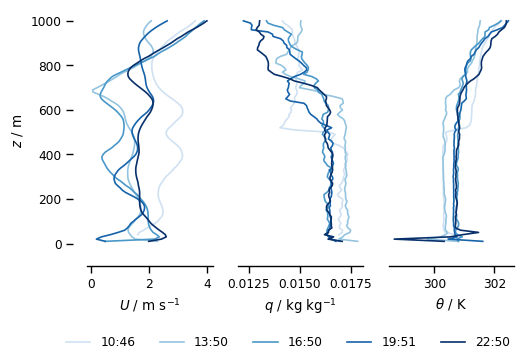

In [8]:
sns.set_context("paper")
fig = plt.figure(figsize=(14/2.54,8/2.54),facecolor='white')
ax= fig.add_subplot(131)
[dset_rad_sel.wspd.isel(launch_time=idx).plot(y='alt',
                label=dset_rad_sel.launch_time.isel(launch_time=idx).dt.strftime('%H:%M').values ) \
 for idx in range(dset_rad_sel.launch_time.shape[0])]
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines)+1)]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i+1])
ax.set_ylabel('$z$ / m')
ax.set_xlabel(r'$U$ / m s$^{-1}$')
sns.despine(offset=10,ax=ax)
ax.spines['left'].set_visible(False)
ax.set_title(None)

ax= fig.add_subplot(132)
[dset_rad_sel.q.isel(launch_time=idx).plot(y='alt',
                label=dset_rad_sel.launch_time.isel(launch_time=idx).dt.strftime('%H:%M').values ) \
 for idx in range(dset_rad_sel.launch_time.shape[0])]
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines)+1)]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i+1])
ax.set_ylabel(None)
ax.set_xlabel(r'$q$ / kg kg$^{-1}$')
sns.despine(offset=10,ax=ax)
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.set_title(None)

ax= fig.add_subplot(133)
[dset_rad_sel.theta.isel(launch_time=idx).plot(y='alt',
                label=dset_rad_sel.launch_time.isel(launch_time=idx).dt.strftime('%H:%M').values ) \
 for idx in range(dset_rad_sel.launch_time.shape[0])]
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines)+1)]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i+1])
ax.set_ylabel(None)
ax.set_yticks([])
ax.set_xlabel(r'$\theta$ / K')
sns.despine(offset=10,ax=ax)
ax.spines['left'].set_visible(False)
ax.set_title(None)

ax.legend(loc='upper center', bbox_to_anchor=(-0.8, -0.3),
          ncol=5,frameon=False)

plt.savefig('../../../figures/profile_doldrums.pdf',
            format='pdf',bbox_inches='tight',orientation={'landscape'})
